In [ ]:
!nvidia-smi

Thu Aug  1 13:26:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install Grounding DINO & SAM

In [ ]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 460, done.
remote: Counting objects: 100% (229/229), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 460 (delta 169), reused 147 (delta 136), pack-reused 231
Receiving objects: 100% (460/460), 12.87 MiB | 16.11 MiB/s, done.
Resolving deltas: 100% (240/240), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 415.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 81.8 MB/s eta 0:00:00


In [ ]:
%cd {HOME}
!git clone https://github.com/facebookresearch/segment-anything-2.git
%cd {HOME}/segment-anything-2
!pip install -e . -q

/content
Cloning into 'segment-anything-2'...
remote: Enumerating objects: 306, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 306 (delta 10), reused 8 (delta 7), pack-reused 281
Receiving objects: 100% (306/306), 42.93 MiB | 12.13 MiB/s, done.
Resolving deltas: 100% (20/20), done.
/content/segment-anything-2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.1 MB/s eta 0:00:00
  Building

In [ ]:
!pip install supervision==0.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting uninstall: supervision
    Found existing installation: supervision 0.22.0
    Uninstalling supervision-0.22.0:
      Successfully uninstalled supervision-0.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sam-2 1.0 requires pillow>=9.4.0, but you have pillow 8.4.0 which is incompatible.
fastai 2.7.15 requires pillow>=9.0.0, but you have pillow 8.4.0 which is incompatible.
scikit-image 0.23.2 requires pillow>=9.1, but you have pillow 8.4.0 which is incompatible.
groundingdino 0.1.0 requires supervision>=0.22.0, but you have supervision 0.12.0 

## Download Grounding DINO & SAM Weights 🏋️



In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
!wget -q https://dl.fbaipublicfiles.com/segment_anything_2/072824/sam2_hiera_large.pt

/content
/content/weights


In [ ]:
GROUNDING_DINO_CONFIG_PATH = '/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py'
GROUNDING_DINO_CHECKPOINT_PATH = '/content/weights/groundingdino_swint_ogc.pth'

## Load Grounding DINO Model

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

GD_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

/content/GroundingDINO


/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


## Load SAM

In [ ]:
import cv2
import torch
import base64

import numpy as np
import supervision as sv

In [ ]:
%cd {HOME}/segment-anything-2

from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sam2_checkpoint = "/content/weights/sam2_hiera_large.pt"
model_cfg = "sam2_hiera_l.yaml"

sam2_model = build_sam2(model_cfg, sam2_checkpoint, device=DEVICE, apply_postprocessing=False)
sam2_predictor = SAM2ImagePredictor(sam2_model)


/content/segment-anything-2


/content/segment-anything-2/sam2/modeling/sam/transformer.py:22: UserWarning: Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.
  OLD_GPU, USE_FLASH_ATTN, MATH_KERNEL_ON = get_sdpa_settings()


## Grounding DINO Demo

In [ ]:
SOURCE_IMAGE_PATH = "/content/dbdf6061b8116a14_GettyImages-1055515620.webp"
CLASSES = ['hat', 'sunglasses', 'shirt', 'blouse', 'jacket', 'sweater', 'blazer', 'cardigan', 'handbag', 'skirt', 'pants', 'dress', 'shoes', 'boots', 'slippers']
BOX_TRESHOLD = 0.36
TEXT_TRESHOLD = 0.25

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:91: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


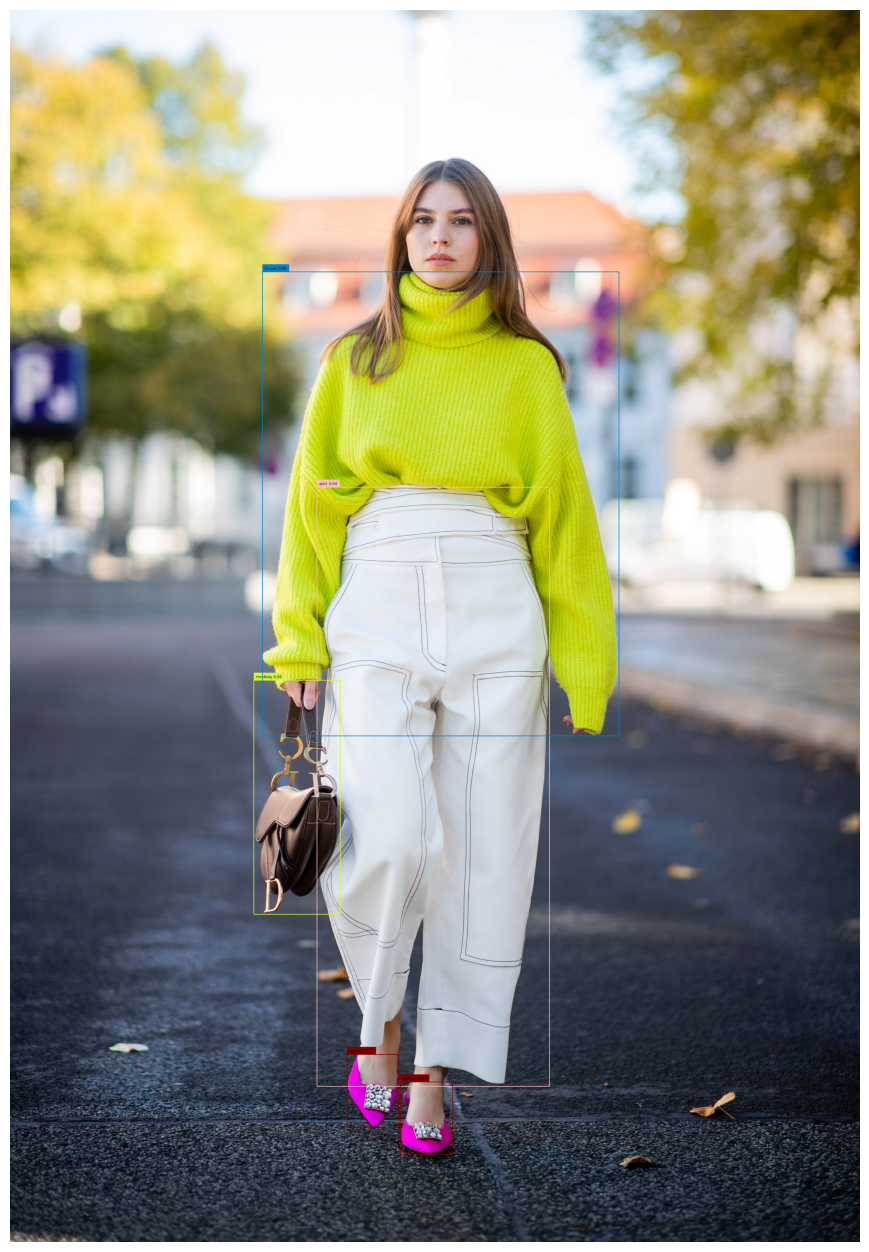

In [ ]:
# load image
original_image = cv2.imread(SOURCE_IMAGE_PATH)

# detect objects
detections = GD_model.predict_with_classes(
    image=original_image,
    classes=CLASSES,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

height, width, channels = original_image.shape
image_area = height * width
area_filtered_detections = detections[(detections.area / image_area) < 0.29]

# annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in area_filtered_detections]
annotated_frame = box_annotator.annotate(scene=original_image.copy(), detections=area_filtered_detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

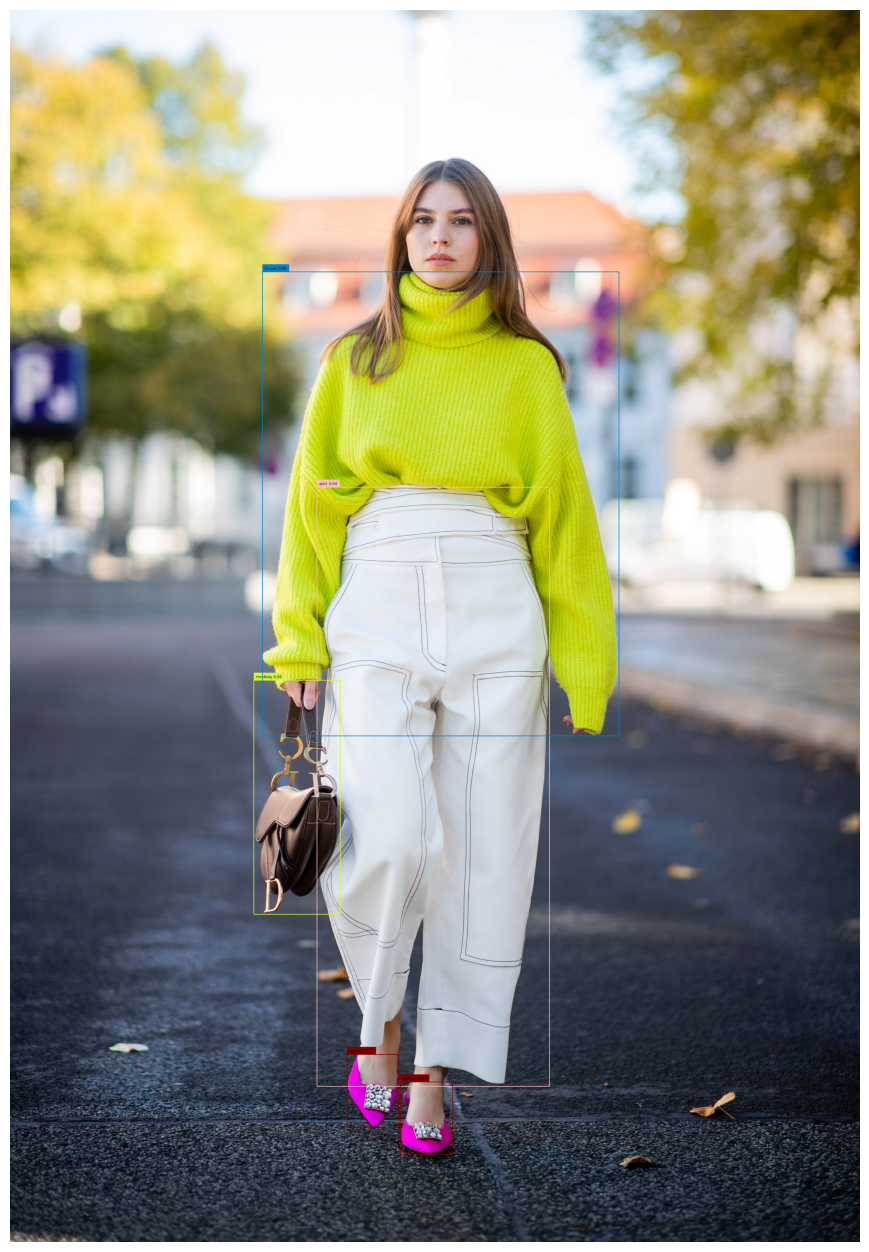

In [ ]:
def is_inside(box1, box2):
    """Check if box1 is completely inside box2."""
    x1, y1, x2, y2 = box1
    x1_inside, y1_inside, x2_inside, y2_inside = box2
    return x1 >= x1_inside and y1 >= y1_inside and x2 <= x2_inside and y2 <= y2_inside

# Remove bounding boxes that are completely inside another bounding box
filtered_boxes = []
filtered_confidences = []
filtered_class_ids = []
for i, box1 in enumerate(area_filtered_detections.xyxy):
    is_inside_other = False
    for j, box2 in enumerate(area_filtered_detections.xyxy):
        if i != j and is_inside(box1, box2):
            is_inside_other = True
            break
    if not is_inside_other:
        filtered_boxes.append(box1)
        filtered_confidences.append(area_filtered_detections.confidence[i])
        filtered_class_ids.append(area_filtered_detections.class_id[i])

area_filtered_detections.xyxy = np.array(filtered_boxes)
area_filtered_detections.confidence = np.array(filtered_confidences)
area_filtered_detections.class_id = np.array(filtered_class_ids)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in area_filtered_detections]
annotated_frame = box_annotator.annotate(scene=original_image.copy(), detections=area_filtered_detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))


## Prompting SAM with detected boxes

In [ ]:
def segment(sam2_predictor: SAM2ImagePredictor, image: np.ndarray, xyxy: np.ndarray) -> np.ndarray:
    sam2_predictor.set_image(image)
    result_masks = []
    for box in xyxy:
        masks, scores, _ = sam2_predictor.predict(
            point_coords=None,
            point_labels=None,
            box=box[None, :],
            multimask_output=True
        )
        index = np.argmax(scores)
        result_masks.append(masks[index])
    return np.array(result_masks)

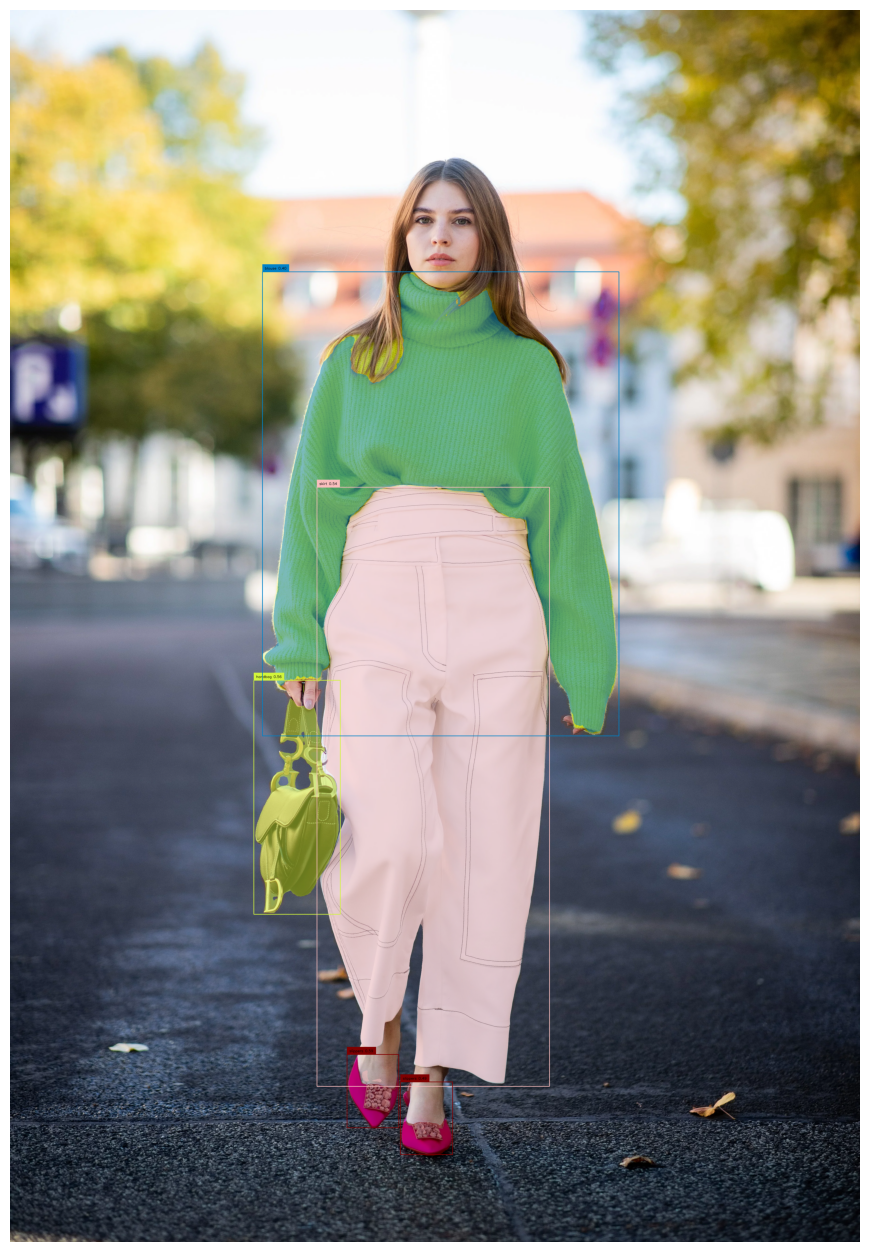

In [ ]:
# convert detections to masks
masks = segment(
    sam2_predictor=sam2_predictor,
    image=cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB),
    # change to detections.xyxy to work with nms filtered detections
    xyxy=area_filtered_detections.xyxy
)

area_filtered_detections.mask = masks

# annotate image with detections
box_annotator = sv.BoxAnnotator()
mask_annotator = sv.MaskAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}"
    for _, _, confidence, class_id, _
    in area_filtered_detections]
annotated_image = mask_annotator.annotate(scene=original_image.copy(), detections=area_filtered_detections)
annotated_image = box_annotator.annotate(scene=annotated_image, detections=area_filtered_detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_image, (16, 16))

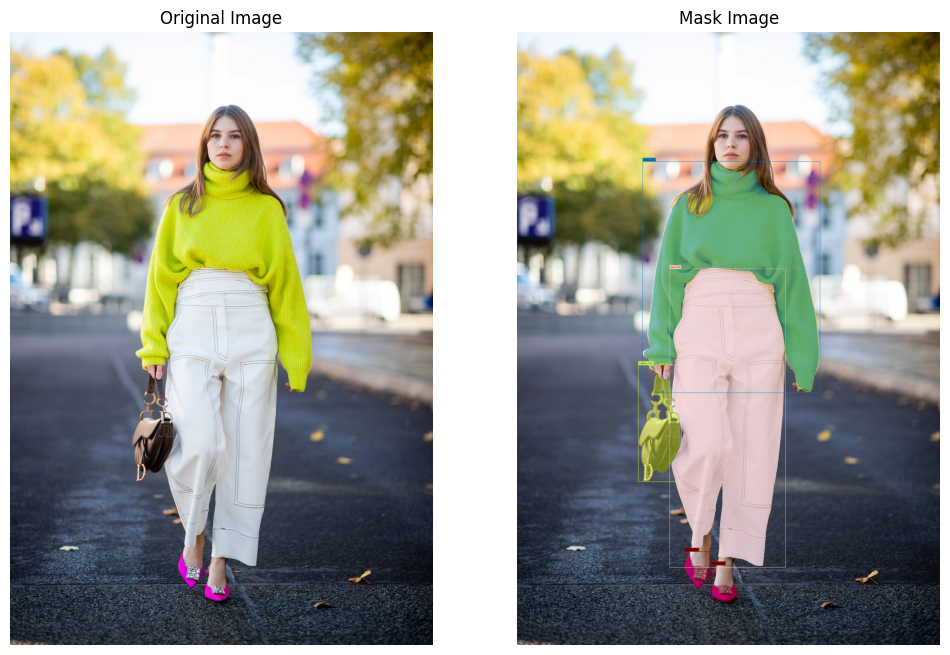

In [ ]:
sv.plot_images_grid(
    images=[original_image, annotated_image],
    grid_size=(1,2),
    titles=['Original Image', 'Mask Image']

)

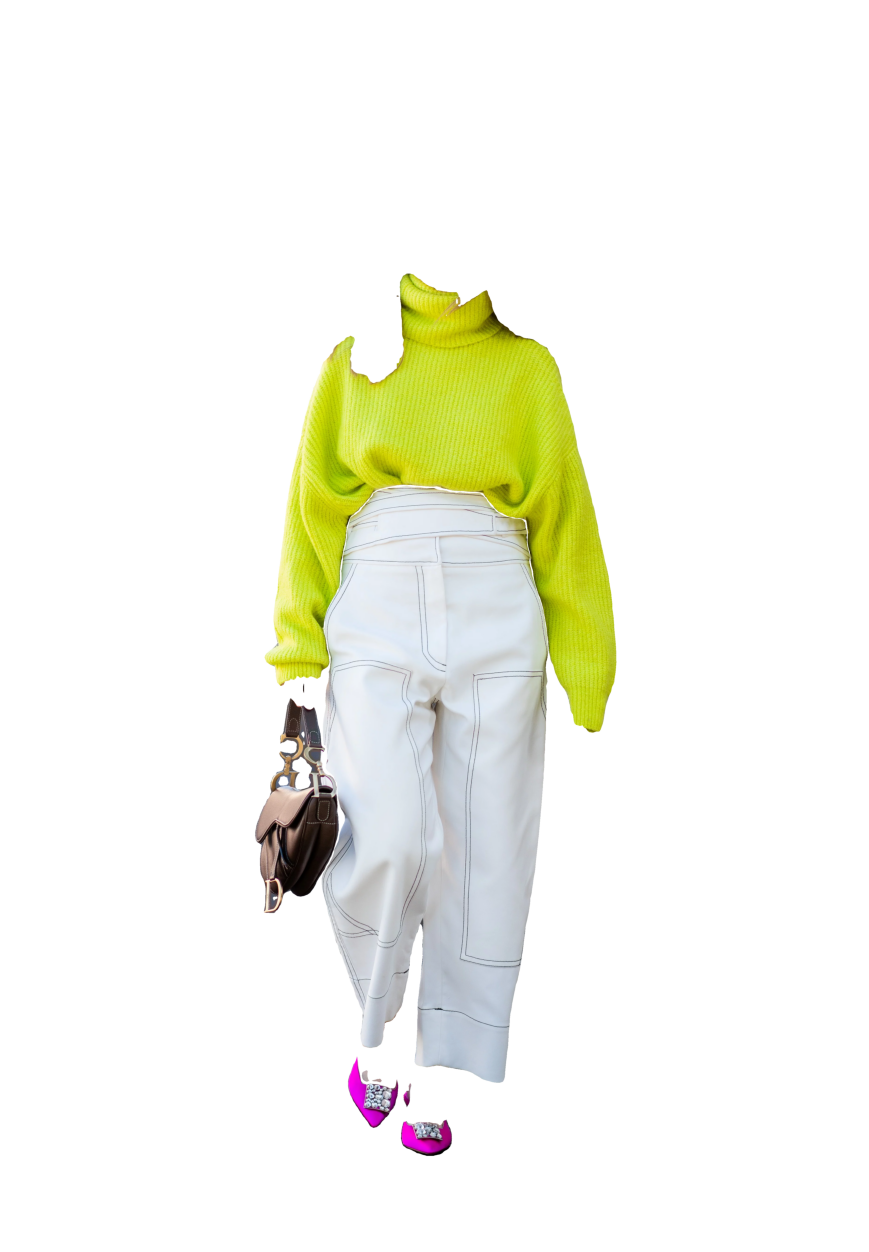

In [ ]:
# Get the dimensions of the original image
height, width, _ = original_image.shape

# Create a white background image
segmented_image = np.ones((height, width, 3), dtype=np.uint8) * 255

# Loop through the masks
for mask in masks:
    # Convert the mask from bool to uint8 (0 and 255)
    mask = mask.astype(np.uint8) * 255

    # Create a three-channel mask
    mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

    # Overlay the mask onto the segmented image
    segmented_image = np.where(mask != 0, original_image, segmented_image)

# Display or save the segmented image for this mask
sv.plot_image(segmented_image, (16, 16))

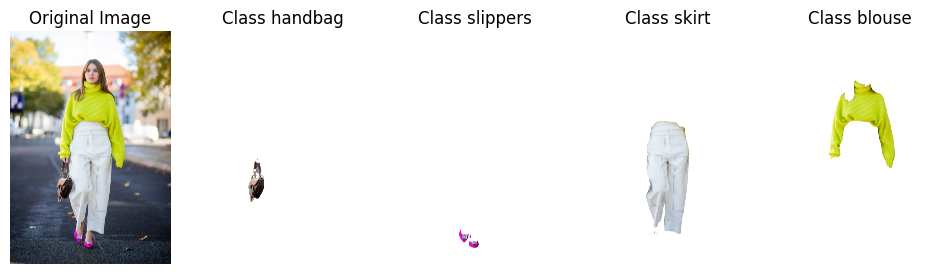

In [ ]:
# Create a white background image
white_bg = np.ones((height, width, 3), dtype=np.uint8) * 255

# Create a dictionary to store masks for each class
class_masks = {}

# Specify the path where you want to save the images
save_path = '/content/extracted_clothes'

# Make sure the directory exists, if not, create it
os.makedirs(save_path, exist_ok=True)

# Loop through the masks and detections
for mask, class_id in zip(masks, detections.class_id):
    # Convert the mask from bool to uint8 (0 and 255)
    mask = mask.astype(np.uint8) * 255

    # Create a three-channel mask
    mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

    # Initialize the class mask if it doesn't exist
    if class_id not in class_masks:
        class_masks[class_id] = white_bg.copy()

    # Combine the mask with the existing class mask
    class_masks[class_id] = np.where(mask != 0, original_image, class_masks[class_id])

# Create lists to store images and titles
images = [original_image]
titles = ['Original Image']

# Append the combined class masks to the lists
for class_id, class_mask in class_masks.items():
    images.append(class_mask)
    titles.append(f'Class {CLASSES[class_id]}')
    file_name = f'class_{CLASSES[class_id]}.png'
    file_path = os.path.join(save_path, file_name)
    cv2.imwrite(file_path, class_mask)

# Plot the images in a grid
grid_size = (1, len(images))
sv.plot_images_grid(images=images, grid_size=grid_size, titles=titles)

In [ ]:
!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00


In [ ]:
import openai
import os
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [ ]:
from PIL import Image
import base64
import requests
import math

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')


def calculate_image_tokens(image_path, detail='high'):
    """
    Calculate the token cost for an image.

    Args:
        image_path (str): Path to the image file.
        detail (str, optional): Detail level of the image. Can be 'high' or 'low'. Defaults to 'high'.

    Returns:
        int: The token cost for the image.
    """
    if detail.lower() == 'low':
        return 85

    try:
        from PIL import Image
        image = Image.open(image_path)
        width, height = image.size
    except (ImportError, FileNotFoundError):
        print("Error: Unable to open the image.")
        return 0

    # Resize the image to fit within a 2048 x 2048 square, maintaining aspect ratio
    if max(width, height) > 2048:
        aspect_ratio = width / height
        if aspect_ratio > 1:
            width = 2048
            height = int(2048 / aspect_ratio)
        else:
            height = 2048
            width = int(2048 * aspect_ratio)

    # Scale the image such that the shortest side is 768px
    shortest_side = min(width, height)
    scale_factor = 768 / shortest_side
    width = int(width * scale_factor)
    height = int(height * scale_factor)

    # Count the number of 512px squares needed to represent the image
    num_squares = math.ceil(width / 512) * math.ceil(height / 512)

    # Calculate the token cost
    token_cost = num_squares * 170 + 85

    return token_cost


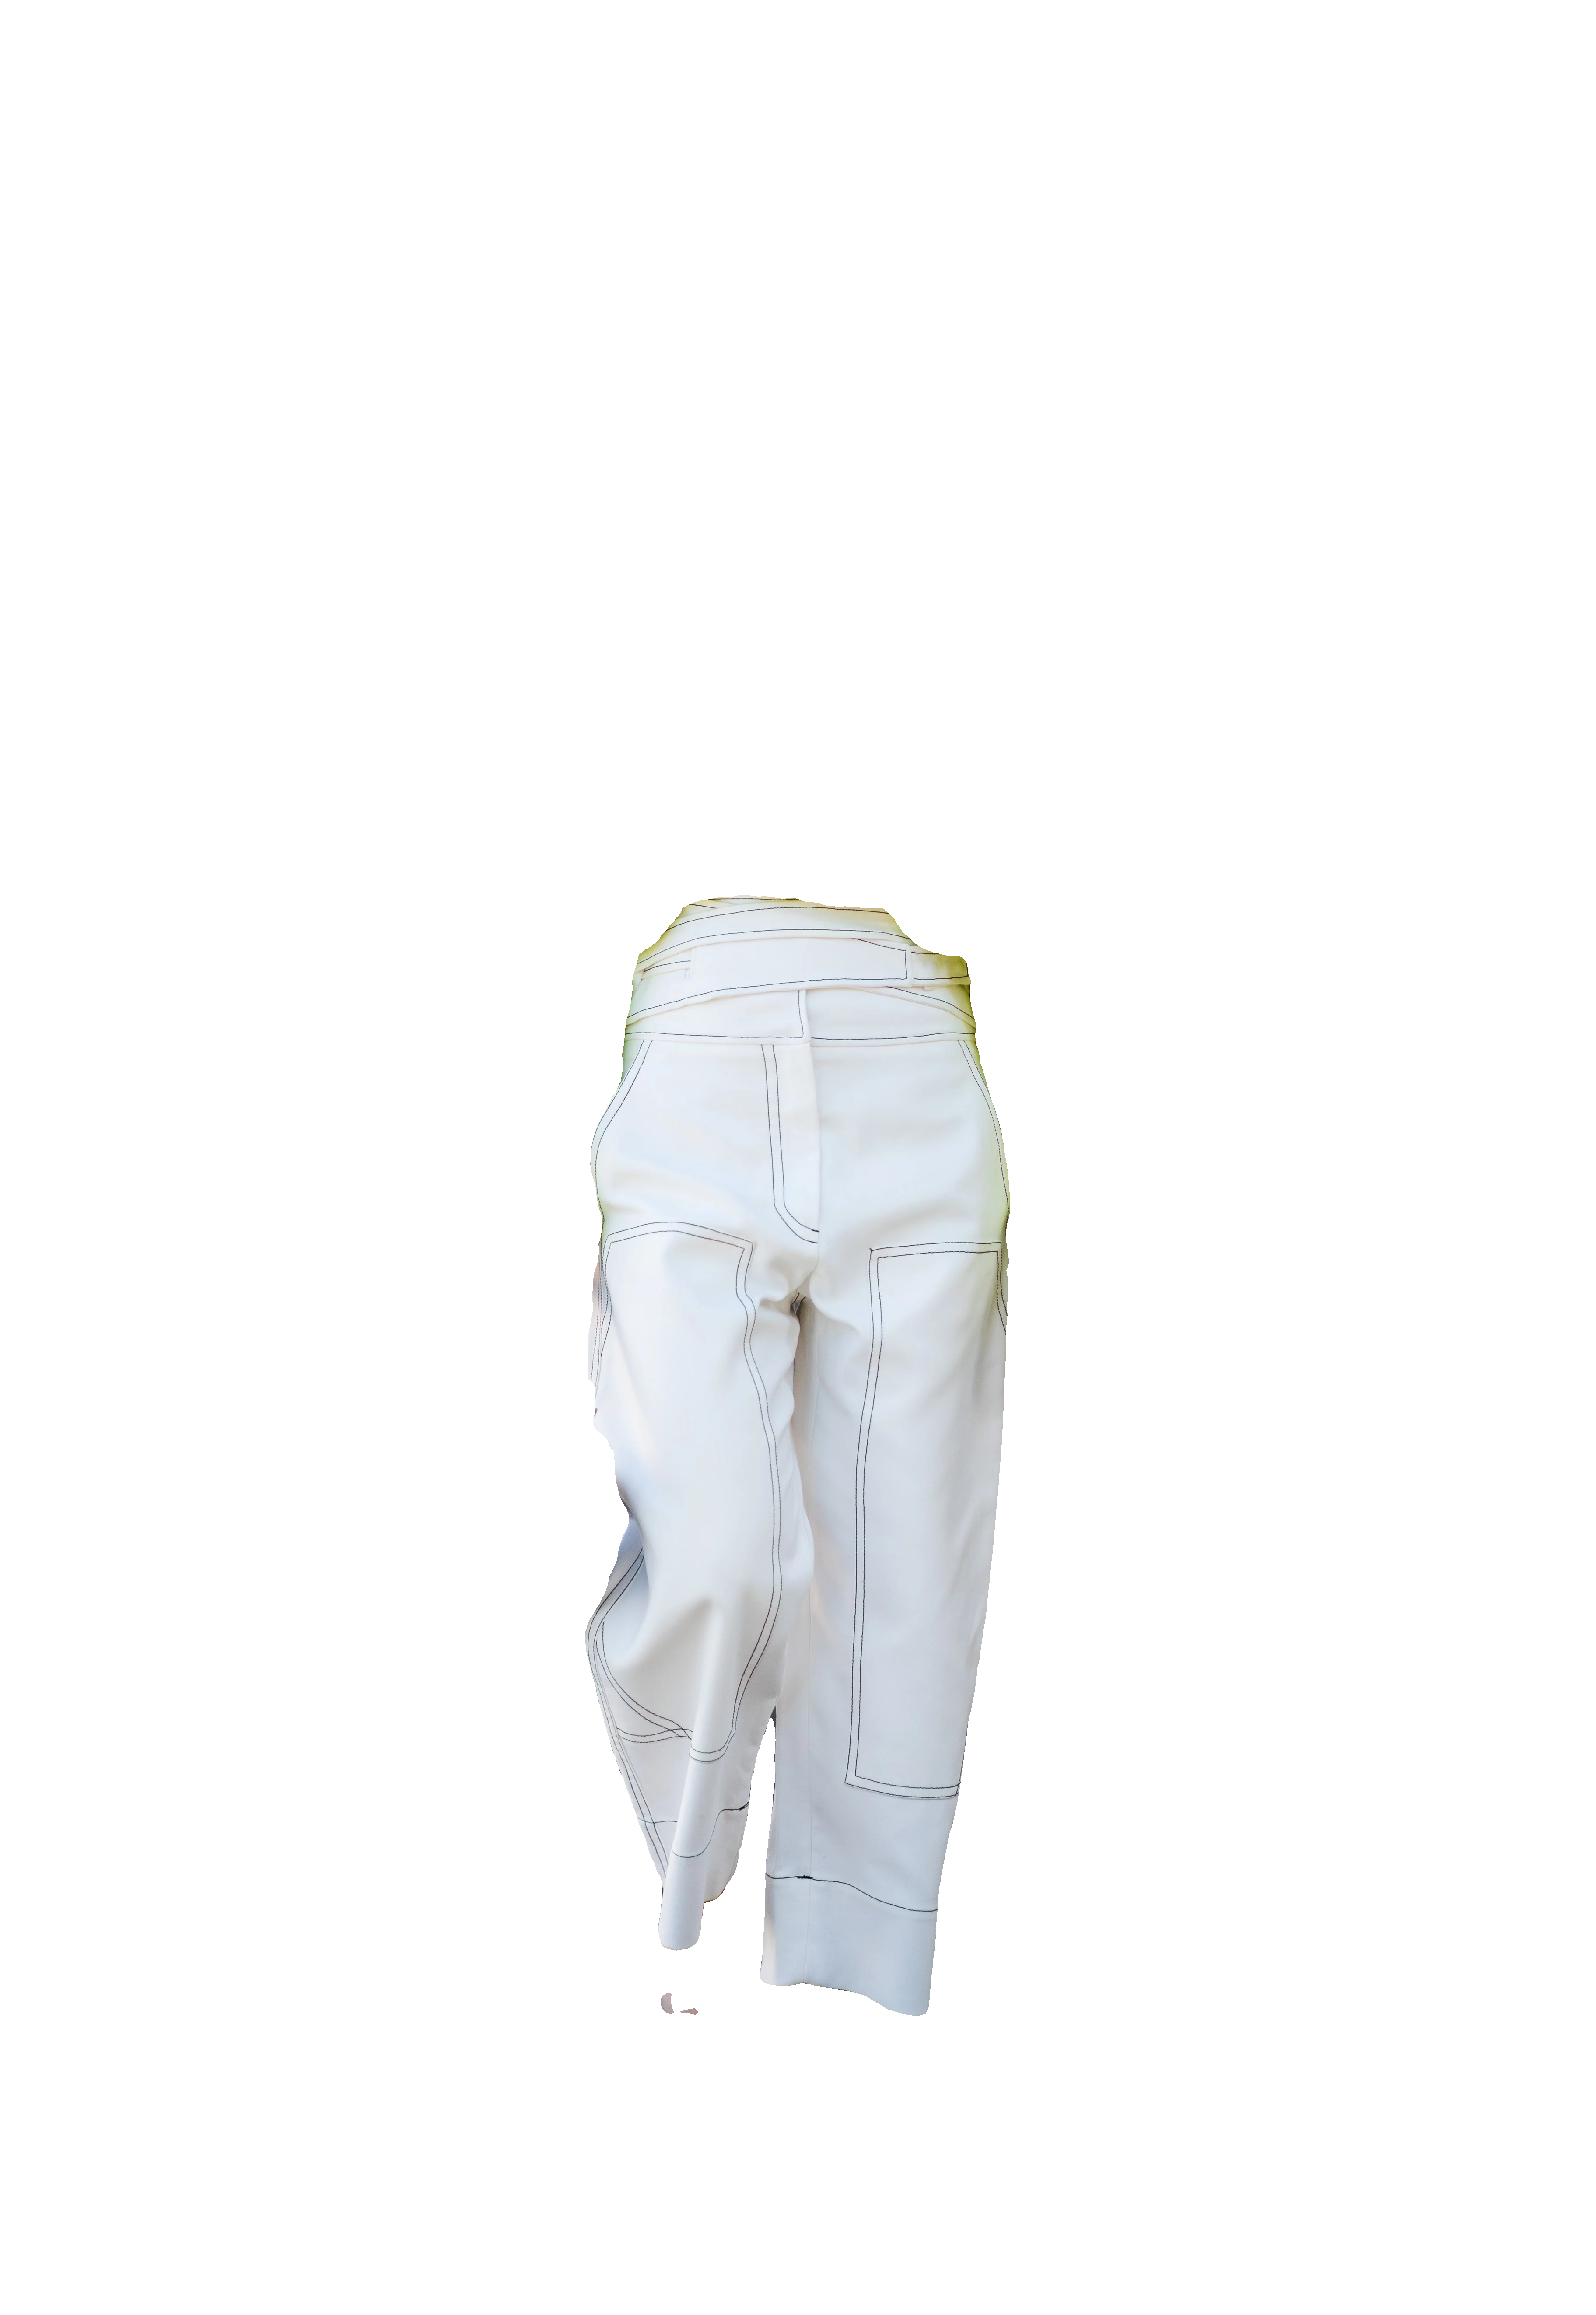

In [ ]:
# Path to your image
image_path = "/content/extracted_clothes/class_skirt.png"

Image.open(image_path)

In [ ]:
# Getting the base64 string
base64_image = encode_image(image_path)

# Calculate GPT-4V cost based on actual image dimensions
image_tokens = calculate_image_tokens(image_path)
text_tokens = 575
total_input_price = ((image_tokens + text_tokens) / 1000) * 0.01
max_output_price = (100 / 1000) * 0.03

print(f"The estimated cost for this image is {image_tokens} tokens.")
print(f"Total approximate input tokens is {image_tokens + text_tokens}.")
print(f"Total price is {total_input_price + max_output_price}$. if gpt-4v used")

The estimated cost for this image is 1105 tokens.
Total approximate input tokens is 1680.
Total price is 0.019799999999999998$. if gpt-4v used


In [ ]:
system_prompt = """
You are a helpful assistant that can analyze clothes images and provide detailed classification.
Desired JSON format (note xxx is a placeholder, if not evident, put "N/A" instead):
{"Suggested seasons": xxx, "Category": xxx, "Sub-category": xxx, "Color": xxx, "Material": xxx, "Pattern": xxx}
Begin all AI responses with the character ‘{’ to produce valid JSON, markdown output is prohibited.
"""

user_prompt = """
Given an image of a clothing item, your task is to analyze and return the information in the valid JSON format.

Suggested seasons: [Spring/Summer/Fall/Winter] - can be several
Category: [Tops/Dresses/Pants/Skirts/Outerwear/Shoes/Bags/Headwear] - only one
Sub-category:
[
Tops:
T-shirts
Long Sleeve T-shirts
Sleeveless T-shirts
Polo Shirts
Tanks & Camis
Crop Tops
Blouses
Shirts
Sweatshirts
Hoodies
Sweaters
Sweater Vests
Sports Top
Bodysuits;

Dresses:
Day Dresses
T-shirt Dresses
Shirt Dresses
Sweatshirt Dresses
Sweater Dresses
Jacket Dresses
Suspender Dresses
Jumpsuits
Party Dresses
Mini Dresses;

Outer:
Coats
Trench Coats
Fur Coats
Shearling Coats
Blazers
Jackets
Blousons
Varsity Jackets
Trucker Jackets
Biker Jackets
Cardigans
Zip Up Hoodies
Field Jackets
Sports Jackets
Fleece Jackets
Parkas
Down Jackets
Puffer Jackets
Vests;

Shoes:
Sneakers
Slip Ons
Sports Shoes
Hiking Shoes
Boots
Combat Boots
Ugg Boots
Loafers & Loafer Mules
Boat Shoes & Moccasins
Flat Shoes
Heels
Sandals
Sandal Heels
Slides
Mule Heels;

Pants:
Jeans
Trousers
Dress Pants
Track Pants
Leggings
Shorts;

Skirts:
Mini Skirts
Midi Skirts
Maxi Skirts;

Bags:
Tote
Shoulder
Crossbody
Waist
Canvas
Backpacks
Duffel
Clutch
Briefcases
Drawstring
Suitcases;

Headwear:
Cap
Hats
Beanies
Berets
Fedoras
Sun Hats;
] - only one
Color: [Describe the main color(s)] - can be several
Material: [Cotton/Linen/Polyester/Fur/Tweed/etc. or N/A if not evident] - only one
Pattern: [Solid-color/Checked/Striped/etc.] - only one
"""

In [ ]:
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
     {
      "role": "system",
      "content": system_prompt
     },
     {
      "role": "user",
      "content": [
        {"type": "text", "text": user_prompt},
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/png;base64,{base64_image}",
          },
        },
      ],
    }
  ],
  max_tokens=100,
)

print(response.choices[0].message.content)

{  
  "Suggested seasons": ["Spring", "Summer", "Fall"],  
  "Category": "Pants",  
  "Sub-category": "Trousers",  
  "Color": "White",  
  "Material": "N/A",  
  "Pattern": "Solid-color"  
}  
